# Heart Attack Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("heart.csv")

Output/target value is the predition variable. 0 for low chance and 1 for higher chance.

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Shuffling dataset
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Splitting the dataset
x = df.drop('output', axis='columns').values
y = df['output'].values

In [ ]:
# Pandas df to Numpy array
dataset = df.values

In [ ]:
# Mean normalization
mean  = x.mean(axis = 0)
x -= mean
std = x.std(axis = 0)
x /= std

In [ ]:
ageNormalize = x[:, 0] / x[:, 0].max()
cholNormalize = x[:, 4] / x[:, 4].max()

Text(0.5, 1.0, 'Histogram of age values')

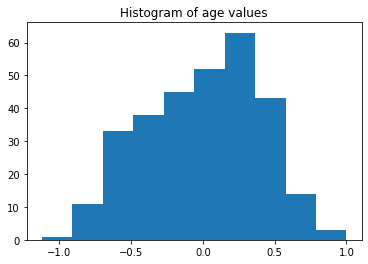

In [ ]:
plt.hist(ageNormalize)
plt.title("Histogram of age values")

Text(0.5, 1.0, 'Histogram of cholesterol values')

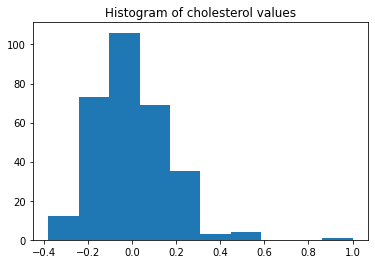

In [ ]:
plt.hist(cholNormalize)
plt.title("Histogram of cholesterol values")

Text(0.5, 1.0, 'Distribution of output label')

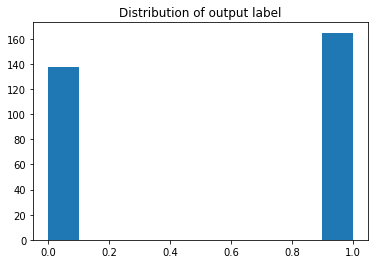

In [ ]:
plt.hist(dataset[:, 13])
plt.title("Distribution of output label")

# Building a NN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
## Base model
model1 = Sequential()
model1.add(Dense(8, input_dim = len(x[0, :]), activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
## Base model 2
model2 = Sequential()
model2.add(Dense(8, input_dim = len(x[0, :]), activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
## Base model 3
model3 = Sequential()
model3.add(Dense(8, input_dim = len(x[0, :]), activation='relu'))
model3.add(Dense(6, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
## Overfitting model
modelOfit = Sequential()
modelOfit.add(Dense(80, input_dim = len(x[0, :]), activation='relu'))
modelOfit.add(Dense(40, activation='relu'))
modelOfit.add(Dense(1, activation='sigmoid'))

In [ ]:
## Last activation linear model
modelLinear = Sequential()
modelLinear.add(Dense(8, input_dim = len(x[0, :]), activation='relu'))
modelLinear.add(Dense(4, activation='relu'))
modelLinear.add(Dense(1, activation='linear'))

In [ ]:
## Last activation relu model
modelRelu = Sequential()
modelRelu.add(Dense(8, input_dim = len(x[0, :]), activation='relu'))
modelRelu.add(Dense(4, activation='relu'))
modelRelu.add(Dense(1, activation='relu'))

In [ ]:
# Compile all the models
model1.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model2.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model3.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
modelOfit.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
modelLinear.compile(loss = 'mse', optimizer='rmsprop', metrics=['mae'])
modelRelu.compile(loss = 'mse', optimizer='rmsprop', metrics=['mae'])

In [ ]:
history = model1.fit(x, y, epochs = 256, verbose = 0)
history2 = model2.fit(x, y, epochs = 256, verbose = 0)
history3 = model3.fit(x, y, epochs = 256, verbose = 0)
history4 = modelOfit.fit(x, y, epochs = 256, verbose = 0)
history5 = modelLinear.fit(x, y, epochs = 256, verbose = 0)
history6 = modelRelu.fit(x, y, epochs = 256, verbose = 0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def modelScores(x, y, model):
  prediction = model.predict(x)

  accuracy = accuracy_score(y, prediction.round()) * 100
  precision = precision_score(y, prediction.round()) * 100.0
  recall = recall_score(y, prediction.round()) * 100.0
  f1score = f1_score(y, prediction.round())

  print("Accuracy: %.2f%%" % (accuracy))
  print("Precision: %.2f%%" % (precision))
  print("Recall: %.2f%%" % (recall))
  print("F1-score: %.2f\n\n" % (f1score))
  return prediction

In [ ]:
print("Model 1:\n")
model1score = modelScores(x, y, model1)
print("Model 2:\n")
model2score = modelScores(x, y, model2)
print("Model 3:\n")
model3score = modelScores(x, y, model3)
print("Model Overfit:\n")
modelOfitscore = modelScores(x, y, modelOfit)
print("Model Linear:\n")
modelLinearscore = modelScores(x, y, modelLinear)
print("Model Relu:\n")
modelReluscore = modelScores(x, y, modelRelu)

Model 1:

Accuracy: 90.10%
Precision: 89.94%
Recall: 92.12%
F1-score: 0.91


Model 2:

Accuracy: 90.76%
Precision: 90.06%
Recall: 93.33%
F1-score: 0.92


Model 3:

Accuracy: 94.39%
Precision: 95.68%
Recall: 93.94%
F1-score: 0.95


Model Overfit:

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 1.00


Model Linear:

Accuracy: 94.06%
Precision: 93.49%
Recall: 95.76%
F1-score: 0.95


Model Relu:

Accuracy: 94.06%
Precision: 94.01%
Recall: 95.15%
F1-score: 0.95




# Model 3 is best performing model

In [ ]:
from sklearn.metrics import roc_curve, auc
def rocGraph(yvalid, ypred, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y, ypred)
    plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
    plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
    plt.title(title, fontsize=10)
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.legend(loc='best', fontsize=10)
    plt.show()

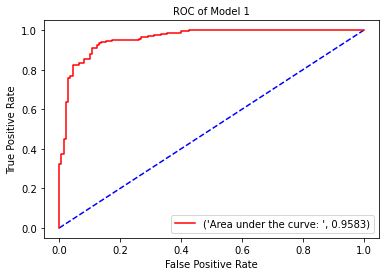

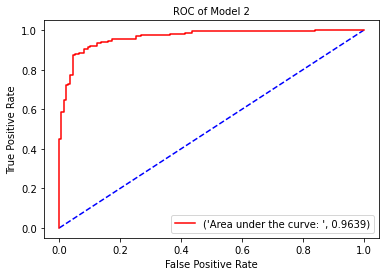

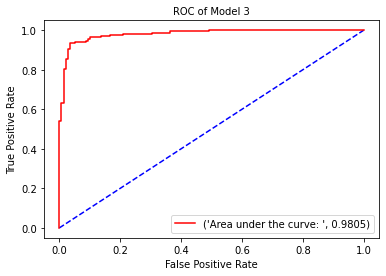

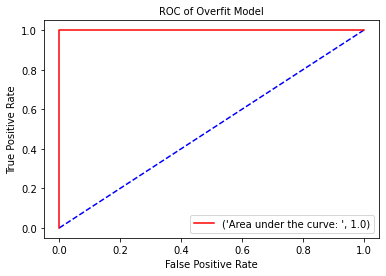

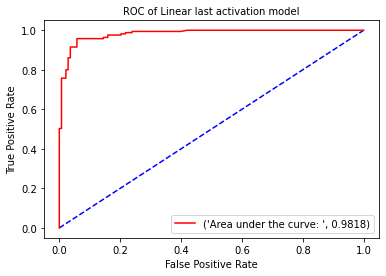

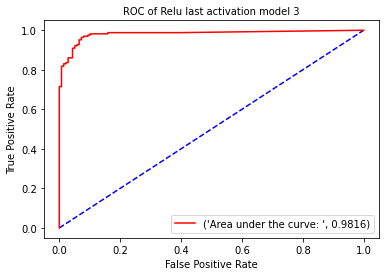

In [ ]:
rocGraph(y, model1score, 'ROC of Model 1')
rocGraph(y, model2score, 'ROC of Model 2')
rocGraph(y, model3score, 'ROC of Model 3')
rocGraph(y, modelOfitscore, 'ROC of Overfit Model')
rocGraph(y, modelLinearscore, 'ROC of Linear last activation model')
rocGraph(y, modelReluscore, 'ROC of Relu last activation model 3')

In [ ]:
# Data is already shuffled
index20 = int(0.2 * len(dataset[:, 0]))

xvalid = x[:index20, :]
yvalid = y[:index20]

xtrain = x[index20:, :]
ytrain = y[index20:]

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = len(x[0, :]), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
modelOver = Sequential()
modelOver.add(Dense(80, input_dim = len(x[0, :]), activation='relu'))
modelOver.add(Dense(40, activation='relu'))
modelOver.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
modelOver.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback_a = ModelCheckpoint(filepath = 'model1.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_over = ModelCheckpoint(filepath = 'modelover.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)

callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=0)
callback_overb = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=0)

history = model.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), epochs = 512, batch_size=128, callbacks = [callback_a, callback_b], verbose = 0)
historyOver = model.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), epochs = 512, batch_size=128, callbacks = [callback_over, callback_overb], verbose = 0)

In [ ]:
# From activity 7
def learning_curves(model_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    ax1.plot(model_history.history['loss'])
    ax1.plot(model_history.history['val_loss'])
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['training', 'validation'], loc="best")

    ax2.plot(model_history.history['accuracy'])
    ax2.plot(model_history.history['val_accuracy'])
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(['training', 'validation'], loc='best')
    fig.show()

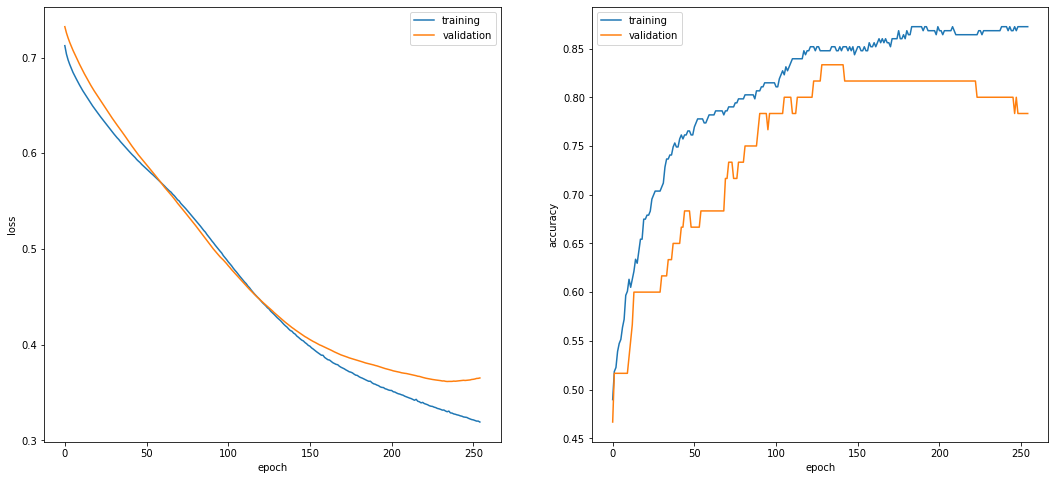

In [ ]:
learning_curves(history)

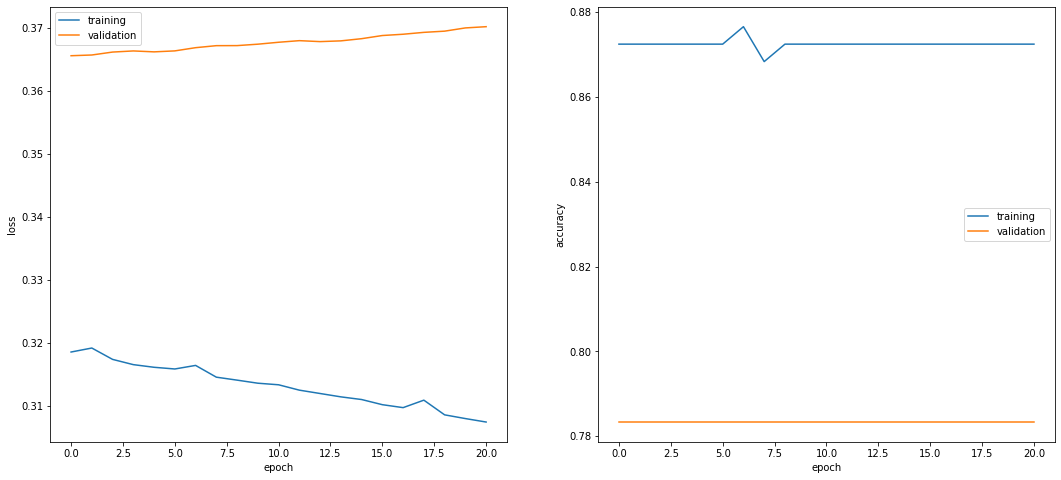

In [ ]:
learning_curves(historyOver)

In [ ]:
%%shell
jupyter nbconvert --to html aiheart.ipynb

[NbConvertApp] Converting notebook aiheart.ipynb to html
[NbConvertApp] Writing 560995 bytes to aiheart.html
